<h2>Drug Classification</h2>

<div class="alert alert-block" style="background-color: #757575 ">
    <ol>
        <li>Understanding Data</li>
        <li>Reading Data</li>
        <li>Exploring Data</li>
        <li>Visualizing Data</li>
        <li>Preprocessing</li>
        <li>Split Data into features (X) and target (y)</li>
        <li>Split data into Train/Test sets</li>
        <li>Training Model</li>
        <ol>
            <li>KNN</li>
            <li>Decision Tree</li>
            <li>Random Forest</li>
        </ol>
        <li>Conclusion</li>
    </ol>
</div>

<h2>Understanding Data</h2>

In this dataset. we have information about different patients and best drug for them. the features included in this dataset are:
- Age: Age of the patient
- Sex (Gender)
- BP Blood Pressure of the patient
- Cholesterol: Cholesterol of the patient
- Na_to_K: Sodium to Potassium ratio in patient's blood
- Drug: Drugs for patients that included DrugA, DrugB, DrugC, DrugX and DrugY

<h2>Loading Packages</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<h2>Reading Data</h2>

In [2]:
data = pd.read_csv("data/drug200.csv")

<p><strong>Note: </strong> You can download the dataset from <a href="#">Github</a>or directly from the <a href="#">Kaggle Website</a></p>

<h2>Exploring Data</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h2>Visualizing Data</h2>

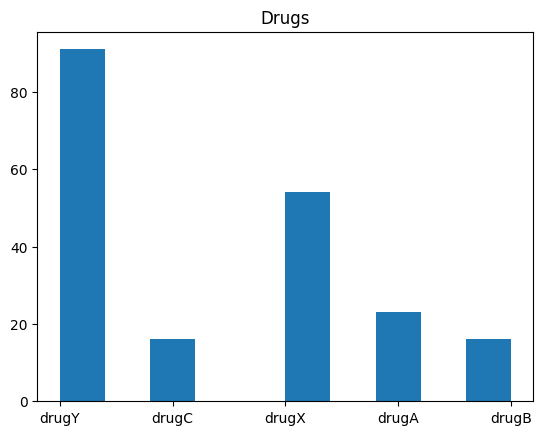

In [5]:
plt.hist(data["Drug"])  # Drugs
plt.title("Drugs")
plt.show()

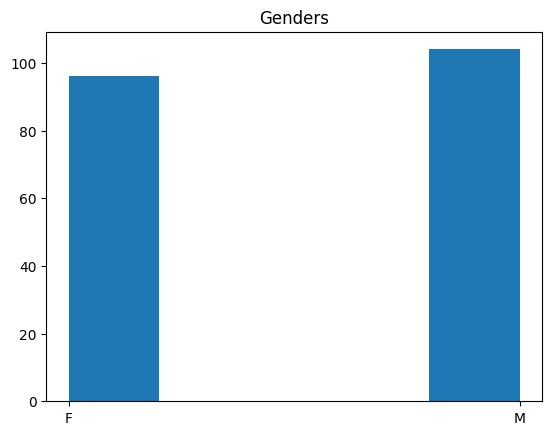

In [6]:
plt.hist(data["Sex"], bins=5)  # Genders
plt.title("Genders")
plt.show()

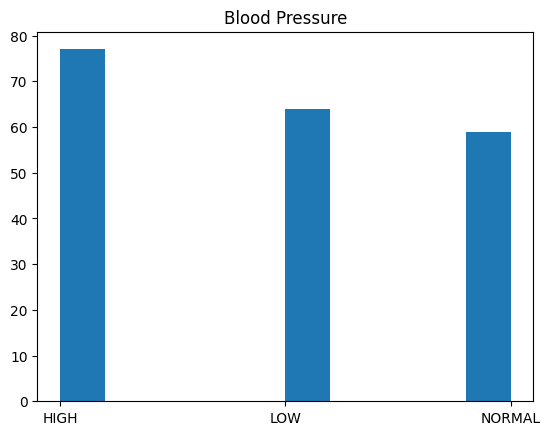

In [7]:
plt.hist(data["BP"])  # Blood Pressure
plt.title("Blood Pressure")
plt.show()

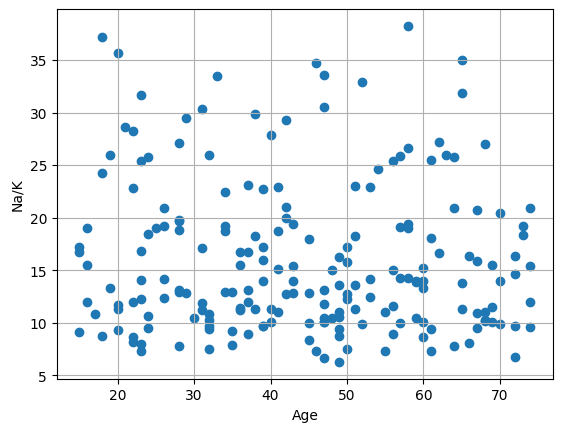

In [8]:
plt.scatter(data["Age"], data["Na_to_K"])
plt.xlabel("Age")
plt.ylabel("Na/K")
plt.grid()
plt.show()

<h2>Preprocessing</h2>

In [9]:
data["Sex"] = LabelEncoder().fit(["F","M"]).transform(data["Sex"])
data["BP"] = LabelEncoder().fit(["LOW", "NORMAL", "HIGH"]).transform(data["BP"])
data["Cholesterol"] = LabelEncoder().fit(["NORMAL", "HIGH"]).transform(data["Cholesterol"])
data["Drug"] = LabelEncoder().fit(["drugA", "drugB", "drugC", "drugX", "drugY"]).transform(data["Drug"])

In [10]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


<h2>Split Data into features (X) and target (y)</h2>

In [11]:
X = data[["Sex", "BP", "Cholesterol"]].values

X[:5]

array([[0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [0, 2, 0],
       [0, 1, 0]])

In [12]:
y = data["Drug"]

y[:5]

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int32

<h2>Split Data into Train/Test sets</h2>

we will train our model with Train set and test it with Test set

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=8)

print("Train Size:", train_X.shape[0], "Test Size:", test_X.shape[0])

Train Size: 160 Test Size: 40


<h2>Training Model</h2>

we use three algorithms to train our model:
- KNN (K-Nearest Neighbors)
- Decision Tree
- Random Forest

<h3>KNN</h3>

In [14]:
Ks = 161
acc = np.zeros((Ks-1))

for x in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=x).fit(train_X, train_y)  # Training Model
    predict_y = neigh.predict(test_X)  # Prediction
    acc[x-1] = accuracy_score(test_y, predict_y)  # Accuracy
    
K_ = acc.max()
print("Best K: ", acc.argmax()+1, "Accuray: ", K_)  # Best K

Best K:  28 Accuray:  0.6


<h3>Decision Tree</h3>

In [15]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(train_X, train_y)  # Training Model
predict_y = drugTree.predict(test_X)  # Prediction
DT_ = accuracy_score(test_y, predict_y)  # Accuracy

print("Accuracy:", DT_)

Accuracy: 0.45


<h3>Random Forest</h3>

In [16]:
drugForest = RandomForestClassifier(criterion="entropy", random_state=12).fit(train_X, train_y)  # Training Model
predict_y = drugForest.predict(test_X)  # Prediction
RF_ = accuracy_score(test_y, predict_y)  # Accuracy

print("Accuracy:", RF_)

Accuracy: 0.45


<h2>Conclusion</h2>

<p>Base one three algorithms (KNN, Decision Tree, Random Forest), The best method for this dataset is <strong>KNN</strong> with accuracy of 0.6</p>